In [33]:
in_colab = 'google.colab' in str(get_ipython())
if in_colab == True:
  !pip install yfinance
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
else:
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt

In [34]:
crypto_btc = yf.download(tickers='BTC-USD', start='2018-01-01', end='2022-12-31').drop(columns=[ 'High', 'Low']).round(2).reset_index()
crypto_eth = yf.download(tickers='ETH-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
#crypto_btc['Percent Change'] = crypto_btc['Close'].pct_change()
#crypto_eth['Percent Change'] = crypto_eth['Close'].pct_change()

<AxesSubplot:xlabel='Date'>

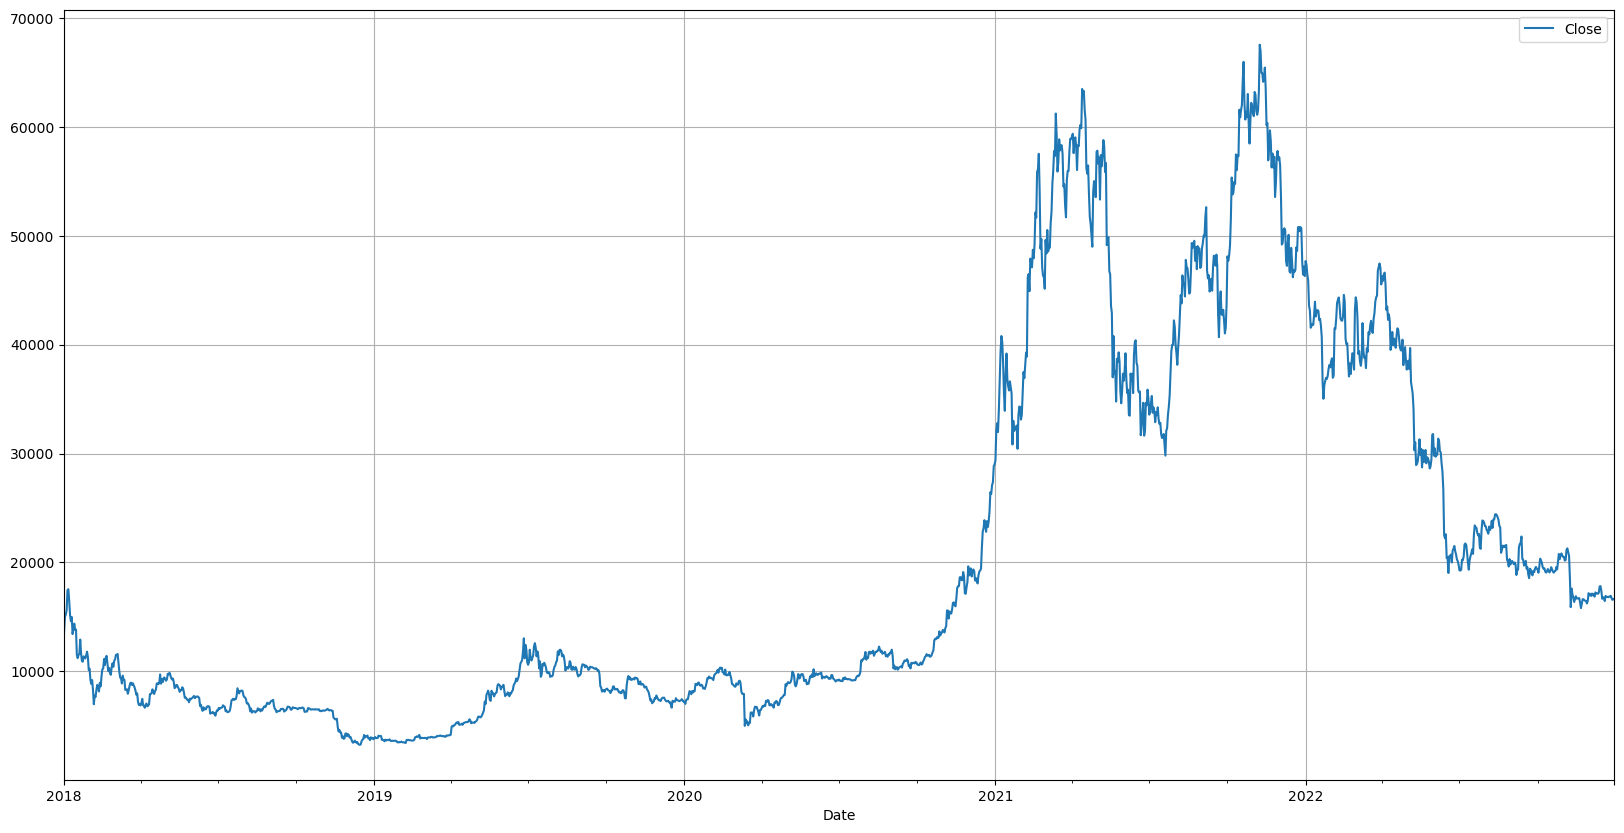

In [36]:
crypto_btc.plot(
    x = 'Date',
    y = 'Close',
    grid = True,
    figsize = (20,10)
)

In [37]:
crypto_btc.head()

,Date,Open,Close,Adj Close,Volume
0,2018-01-01 00:00:00+00:00,14112.2,13657.2,13657.2,10291200000
1,2018-01-02 00:00:00+00:00,13625.0,14982.1,14982.1,16846600192
2,2018-01-03 00:00:00+00:00,14978.2,15201.0,15201.0,16871900160
3,2018-01-04 00:00:00+00:00,15270.7,15599.2,15599.2,21783199744
4,2018-01-05 00:00:00+00:00,15477.2,17429.5,17429.5,23840899072


In [38]:
X = crypto_btc.drop(columns=['Date'])
X

,Open,Close,Adj Close,Volume
0,14112.20,13657.20,13657.20,10291200000
1,13625.00,14982.10,14982.10,16846600192
2,14978.20,15201.00,15201.00,16871900160
3,15270.70,15599.20,15599.20,21783199744
4,15477.20,17429.50,17429.50,23840899072
...,...,...,...,...
1820,16842.25,16919.80,16919.80,11886957804
1821,16919.29,16717.17,16717.17,15748580239
1822,16716.40,16552.57,16552.57,17005713920
1823,16552.32,16642.34,16642.34,14472237479


In [39]:
y = crypto_btc[['Close']]
y

,Close
0,13657.20
1,14982.10
2,15201.00
3,15599.20
4,17429.50
...,...
1820,16919.80
1821,16717.17
1822,16552.57
1823,16642.34


In [40]:
from sklearn.kernel_ridge import KernelRidge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=42)
kr = KernelRidge(kernel= 'linear', alpha = 50e-2, degree = 100)
kr.fit(X_train, y_train)
pred_btc = kr.predict(X)
btc_pred = crypto_btc.copy().drop(columns=['Open','Volume']).rename(columns={'Close':'Actual Price'})
btc_pred['BTC Predicted Price'] = pred_btc
btc_pred['Price Accuracy']= (btc_pred['BTC Predicted Price']/btc_pred['Actual Price']-1)*100
btc_pred

/Users/playb3yond40gb/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


,Date,Actual Price,Adj Close,BTC Predicted Price,Price Accuracy
0,2018-01-01 00:00:00+00:00,13657.20,13657.20,13700.0,0.313388
1,2018-01-02 00:00:00+00:00,14982.10,14982.10,14968.0,-0.094112
2,2018-01-03 00:00:00+00:00,15201.00,15201.00,15226.0,0.164463
3,2018-01-04 00:00:00+00:00,15599.20,15599.20,15620.0,0.133340
4,2018-01-05 00:00:00+00:00,17429.50,17429.50,17402.0,-0.157778
...,...,...,...,...,...
1820,2022-12-26 00:00:00+00:00,16919.80,16919.80,16961.0,0.243502
1821,2022-12-27 00:00:00+00:00,16717.17,16717.17,16768.0,0.304059
1822,2022-12-28 00:00:00+00:00,16552.57,16552.57,16592.0,0.238211
1823,2022-12-29 00:00:00+00:00,16642.34,16642.34,16670.0,0.166203


In [41]:

btc_pred['Price Accuracy'].describe()

count    1825.000000
mean        0.238326
std         0.164405
min        -0.767075
25%         0.152970
50%         0.223990
75%         0.319783
max         2.036095
Name: Price Accuracy, dtype: float64

<AxesSubplot:xlabel='Date'>

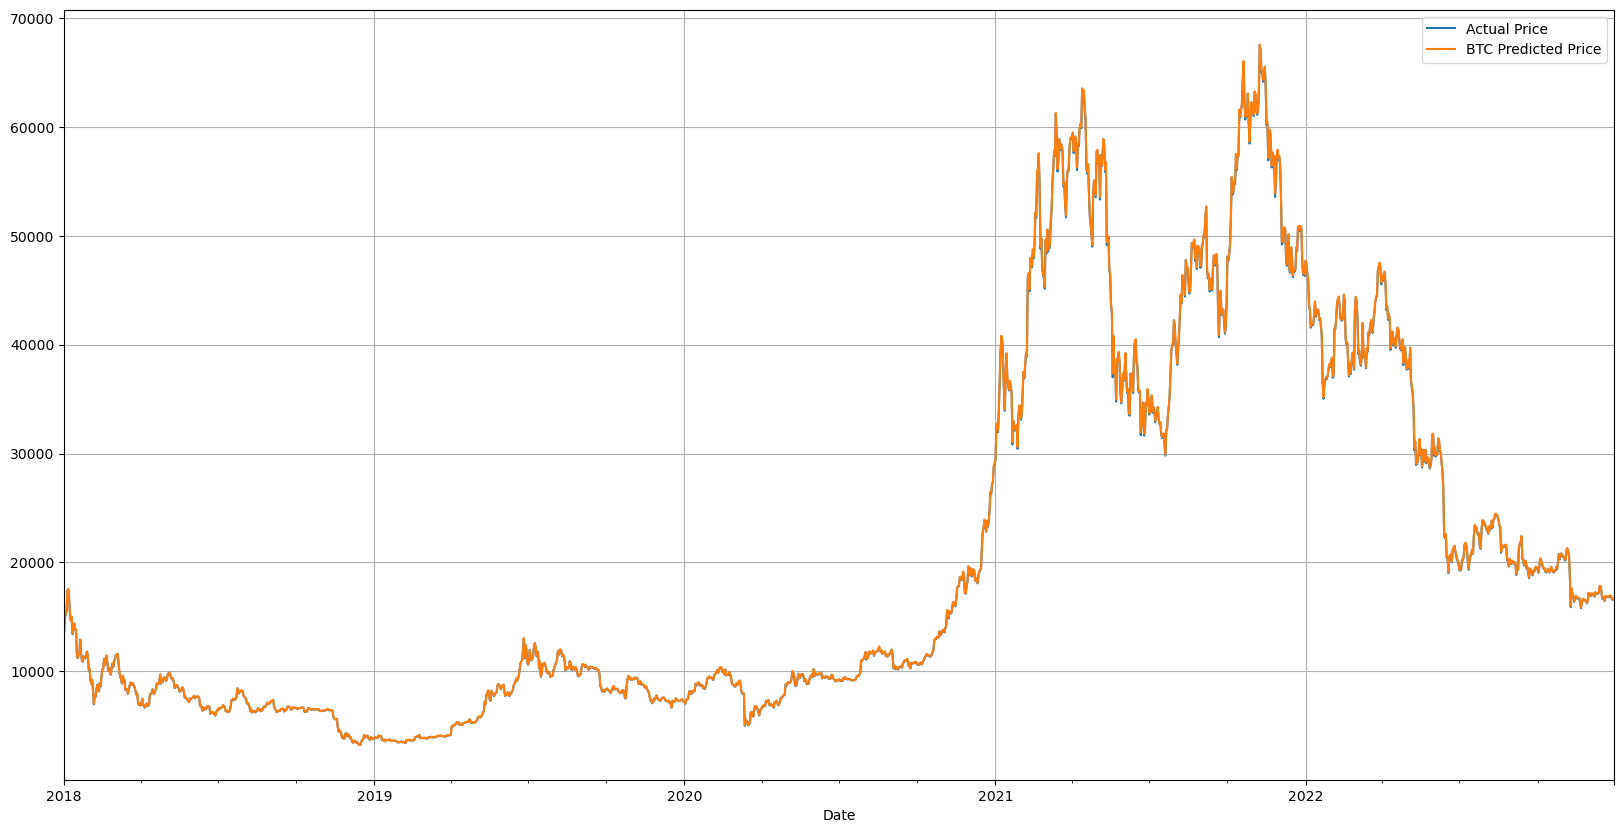

In [43]:
btc_pred.plot(
    x='Date',
    y=['Actual Price','BTC Predicted Price' ],
    grid = True,
    figsize=(20,10)
)